In [1]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA

# Load Data
df = pd.read_excel("DATA MAHASISWA MATDIS A.xlsx", sheet_name="siswa.csv")

Jadi pada langkah pertama kita import library dan baca file penilaianyya.


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Rename kolom atribut ke A, B, C, D
df = df.rename(columns={
    "ADIL DAN AMANAH": "A",
    "SUKA MEMBANTU": "B",
    "NYAMBUNG KALAU NGOROL": "C",
    "ASYIK DAN MENARIK": "D"
})

ubah nama kolom menjadi A, B, C, D agar lebih ringkas

In [4]:
# Bersihkan nilai koma jadi titik lalu ubah ke float
for col in ["A","B","C","D"]:
    df[col] = df[col].astype(str).str.replace(",", ".").astype(float)


In [5]:
# Deteksi otomatis kolom nilai
nilai_cols = df.columns[2:]

# Bersihkan semua kolom nilai
for col in nilai_cols:
    df[col] = df[col].astype(str).str.replace(",", ".").astype(float)


In [6]:
# Ambil data numerik
X = df.loc[:, ["A","B","C","D"]].replace(",", ".", regex=True).astype(float).values
students = df["NAMA"].values
npm = df["NPM"].values

In [8]:
#  Equal Weight
P_equal = np.array([0.25, 0.25, 0.25, 0.25])
scores_equal = X @ P_equal
df["Skor_Equal"] = scores_equal

# 4 mahasiswa terbaik (equal)
top_equal = df.nlargest(4, "Skor_Equal")[["NPM","NAMA","Skor_Equal"]]

equal_df = df.copy()

print("Top 4 Mahasiswa (Equal Weight):")
print(top_equal, "\n")

Top 4 Mahasiswa (Equal Weight):
            NPM                        NAMA  Skor_Equal
7   24083010019     HIZKIA SAMHAN REZAYOSHI       0.950
39  24083010115                 NAJWA SOFIA       0.925
29  24083010079  MUHAMMAD WILDAN SULTANSYAH       0.900
13  24083010044                  VIA AMANDA       0.850 



Semua kolom A, B, C, D diberi bobot sama rata yaitu (25%).
Skor dihitung sebagai rata-rata nilai keempat atribut.
Mahasiswa yang memiliki skor tertinggi dianggap paling konsisten unggul di semua aspek.
Hasil Top 4 (Equal Weight):
HIZKIA SAMHAN REZAYOSHI — 0.950
NAJWA SOFIA — 0.925
MUHAMMAD WILDAN SULTANSYAH — 0.900
VIA AMANDA — 0.850
Mereka adalah mahasiswa dengan nilai rata-rata tertinggi secara umum. Metode ini adil karena tidak memihak atribut tertentu, cocok jika semua aspek dianggap sama penting

In [9]:
# Pastikan kolom nilai sudah dibersihkan ke float (A, B, C, D)
for col in ["A", "B", "C", "D"]:
    df[col] = df[col].astype(str).str.replace(",", ".").astype(float)

# Ambil nilai sebagai matriks
X = df[["A","B","C","D"]].to_numpy()

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Buat dataframe hasil PCA
pca_df = pd.DataFrame({
    "NPM": df["NPM"],
    "NAMA": df["NAMA"],
    "PC1": X_pca[:, 0],
    "PC2": X_pca[:, 1]
})

# Cari 4 mahasiswa terbaik berdasarkan PC1
top_pca = pca_df.nlargest(4, "PC1")

print("Hasil PCA (PC1 & PC2):")
print(pca_df.head())
print("\nTop 4 Mahasiswa berdasarkan PCA:")
print(top_pca)


Hasil PCA (PC1 & PC2):
           NPM                     NAMA       PC1       PC2
0  24083010001     MADINA HEDY ALIFANTI  0.390589  0.175039
1  24083010003      MARIA DWI KURNIASIH  0.693949 -0.025524
2  24083010005  ADINDA PUTRI RACHMAWATI -0.429346  0.184653
3  24083010006           AQUINA SYABITA  0.224809 -0.378263
4  24083010007      VARID PUTRA PRATAMA  0.508206 -0.451577

Top 4 Mahasiswa berdasarkan PCA:
            NPM                        NAMA       PC1       PC2
7   24083010019     HIZKIA SAMHAN REZAYOSHI  0.914814  0.195307
39  24083010115                 NAJWA SOFIA  0.899408 -0.023491
29  24083010079  MUHAMMAD WILDAN SULTANSYAH  0.852977 -0.019485
1   24083010003         MARIA DWI KURNIASIH  0.693949 -0.025524


Hasil PCA (PC1 & PC2), menampilkan hasil transformasi data mahasiswa ke dalam dua komponen utama.

PC1 (Principal Component 1) merupakan dimensi baru yang menyimpan variasi terbesar dari data.
PC2 (Principal Component 2) menyimpan variasi terbesar berikutnya setelah PC1.

Setiap mahasiswa punya nilai di kedua komponen ini, yang menggambarkan posisi mereka di ruang PCA. Misalnya, MADINA HEDY ALIFANTI memiliki PC1 = 0.390589 dan PC2 = 0.17539, artinya cenderung positif di kedua dimensi. Sementara ADINDA PUTRI RACHMAWATI punya PC1 negatif (-0.429346) dan PC2 positif (0.184653), yang menunjukkan arahnya berbeda dibanding mahasiswa dengan skor positif di PC1.

Pada bagian kedua, “Top 4 Mahasiswa berdasarkan PCA”, ditampilkan mahasiswa dengan skor PC1 tertinggi, karena PC1 dianggap paling dominan dalam menjelaskan pola data.

Hizkia Samhan Rezayoshimenempati posisi pertama dengan skor tertinggi.
Disusul Najwa Sofia dan Muhammad Wildan Sultansyah yang juga punya skor tinggi.
Maria Dwi Kurniasih masih termasuk dalam empat besar karena kontribusinya cukup kuat.

Secara keseluruhan, mahasiswa dengan skor PC1 yang tinggi dapat dianggap sebagai yang paling menonjol berdasarkan pola data, sedangkan mahasiswa dengan skor PC1 negatif menunjukkan karakteristik yang berbeda dari mayoritas.



In [10]:
# Matriks Kovarian & Korelasi
cov_df = pd.DataFrame(np.cov(X, rowvar=False, ddof=1), index=["A","B","C","D"], columns=["A","B","C","D"])
corr_df = pd.DataFrame(np.corrcoef(X, rowvar=False), index=["A","B","C","D"], columns=["A","B","C","D"])

print("Matriks Kovarian:")
print(cov_df, "\n")

print("Matriks Korelasi:")
print(corr_df, "\n")

Matriks Kovarian:
          A         B         C         D
A  0.102974  0.069923  0.046897  0.033179
B  0.069923  0.096096  0.047609  0.020846
C  0.046897  0.047609  0.086404  0.027974
D  0.033179  0.020846  0.027974  0.099385 

Matriks Korelasi:
          A         B         C         D
A  1.000000  0.702915  0.497185  0.327979
B  0.702915  1.000000  0.522480  0.213311
C  0.497185  0.522480  1.000000  0.301880
D  0.327979  0.213311  0.301880  1.000000 



 0.327979 0.213311 0.301880 1.000000
Angka diagonal = 1 → setiap variabel tentu berkorelasi sempurna dengan dirinya sendiri.

Korelasi antar variabel:

A–B = 0.70 → kuat positif, artinya mahasiswa yang tinggi di A cenderung tinggi di B juga.

B–C = 0.52 dan A–C = 0.49 → sedang positif, ada kecenderungan sejalan.

A–D = 0.33 dan C–D = 0.30 → lemah positif, hubungannya ada tapi tidak kuat.

B–D = 0.21 → sangat lemah positif, hampir tidak ada keterkaitan.


A dan B paling saling berhubungan.

B dan D hampir tidak punya hubungan.

D secara umum kurang berkaitan dengan nilai lain.

A & B bisa dianggap sebagai indikator yang mirip/berhubungan erat mungkin mewakili kemampuan serupa.

C cukup sejalan dengan A dan B, tapi tidak sekuat hubungan A–B.

D agak beda sendiri tidak banyak berkorelasi dengan variabel lain, jadi bisa jadi aspek unik yang menilai hal berbeda.



In [11]:
# Cosine Similarity antar Mahasiswa
norms = np.linalg.norm(X, axis=1, keepdims=True)
cosine_sim = (X @ X.T) / (norms @ norms.T)

student_labels = [f"{n} - {s}" for n, s in zip(npm, students)]
cosine_df = pd.DataFrame(cosine_sim, index=student_labels, columns=student_labels)

print("Cosine Similarity (Full):")
print(cosine_df)



Cosine Similarity (Full):
                                                    24083010001 - MADINA HEDY ALIFANTI  \
24083010001 - MADINA HEDY ALIFANTI                                            1.000000   
24083010003 - MARIA DWI KURNIASIH                                             0.934996   
24083010005 - ADINDA PUTRI RACHMAWATI                                         0.665310   
24083010006 - AQUINA SYABITA                                                  0.906126   
24083010007 - VARID PUTRA PRATAMA                                             0.826406   
24083010014 - GAITSA NAZWA KANSA                                              0.531909   
24083010017 - Mohammad Alimun Hakim                                           0.710269   
24083010019 - HIZKIA SAMHAN REZAYOSHI                                         0.958097   
24083010028 - RAVEENA AYU DESEMBER SURYOPUTRI                                 0.809876   
24083010029 - Yohanes Olvin Jun Sole                                      

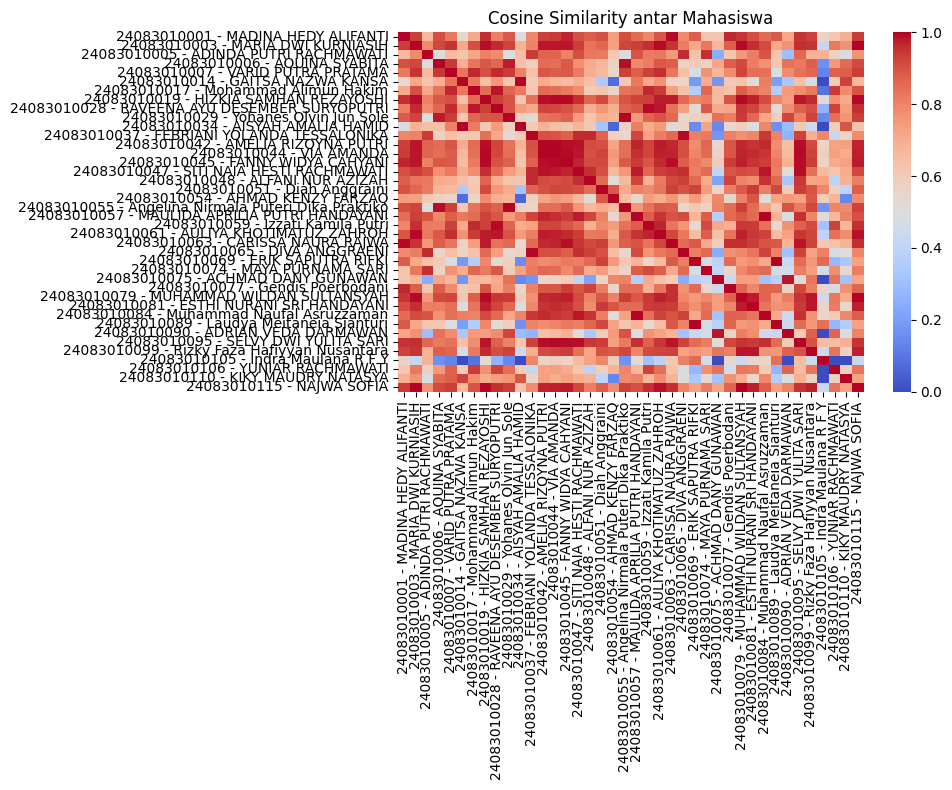

In [12]:
# Visualisasi heatmap

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,8))
sns.heatmap(cosine_df, cmap="coolwarm", vmin=0, vmax=1)
plt.title("Cosine Similarity antar Mahasiswa")
plt.tight_layout()
plt.show()

Heatmap ini menunjukkan tingkat kemiripan antar mahasiswa berdasarkan nilai yang mereka punya. Warna yang muncul menggambarkan seberapa mirip atau bedanya pola nilai tiap orang.

Garis diagonal utama selalu punya nilai 1, karena ya jelas tiap mahasiswa pasti 100% mirip dengan dirinya sendiri.

Kalau ada dua mahasiswa yang warnanya merah terang (similarity di atas 0.9), berarti nilai mereka hampir sama di semua aspek. Bisa dibilang mereka punya kemampuan atau pola belajar yang selevel.

Warna yang agak merah muda (similarity 0.6–0.8) berarti mereka mirip tapi nggak sepenuhnya sama. Ada beberapa bagian nilai yang bedanya lumayan kerasa.

Kalau warnanya biru tua (similarity rendah, <0.5), itu tandanya pola nilainya beda jauh. Biasanya satu mahasiswa punya nilai tinggi di banyak bagian, sedangkan mahasiswa lain justru rendah.

In [13]:
# Simpan semua hasil ke Excel
with pd.ExcelWriter("hasil_analisis_mahasiswa.xlsx") as writer:
    df.to_excel(writer, sheet_name="Data Asli", index=False)
    cov_df.to_excel(writer, sheet_name="Kovarian")
    corr_df.to_excel(writer, sheet_name="Korelasi")
    cosine_df.to_excel(writer, sheet_name="Cosine Similarity")
    equal_df.to_excel(writer, sheet_name="Top 4 Equal Weight")
    pca_df.to_excel(writer, sheet_name="Top 4 PCA")

print("Semua hasil sudah tersimpan di 'hasil_analisis_mahasiswa.xlsx'")


Semua hasil sudah tersimpan di 'hasil_analisis_mahasiswa.xlsx'
